# Heart Disease Prediction Using Machine Learning

## Introduction

Heart disease is a major health issue worldwide, and it is difficult to discover the disease before symptoms emerge. Our goal of this project is to utilize machine learning techniques and predict whether or not a person has heart disease. This will be done through our dataset, which is derived from the Cleveland Heart Disease Database and consists of 14 important attributes selected from a total of 76. It encompasses a range of variables including physical and psychological details, such as age, sex, cholesterol, etc. It also categorizes individuals based on the absence (value 0) or presence (values 1-4) of heart disease, providing a clear framework for analyzing the predictive power of medical test results.

Specifically, the columns in the dataset are as follows:
1. **age**: patient's age
2. **sex**: patient's sex (1 = male, 0 = female)
3. **cp**: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
4. **trestbps**: resting blood pressure (mm Hg)
5. **chol**: serum cholestoral (mg/dl)
6. **fbs**: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
7. **restecg**: resting electrocardiographic results
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes, 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
12. **ca**: number of major vessels (0-3) coloured by flourosopy
13. **thal**: 3 = normal, 6 = fixed defect, 7 = reversable defect
14. **num**: diagnosis of heart disease (0 = absence, 1,2,3,4 = presence)

**Serum cholesterol (chol)**: High levels of serum cholesterol have long been recognized as a risk factor for cardiovascular diseases, including heart disease. Elevated cholesterol levels can lead to the buildup of plaque in the arteries (atherosclerosis), which can restrict blood flow to the heart and increase the risk of heart disease (Jung et al., 2022).

**Maximum heart rate achieved (thalach)**: The maximum heart rate achieved during exercise is indicative of cardiovascular fitness and the overall health of the heart. A lower maximum heart rate may suggest a reduced cardiac reserve or impaired heart function, which could be indicative of underlying heart disease. Conversely, a higher maximum heart rate achieved during exercise is often associated with better cardiovascular health (Keteyian et al., 2013).

Thus, our question is: **What is the likelihood of a patient having heart disease based on their serum cholesterol level and maximum heart rate?**

## Preliminary Exploratory Data Analysis

#### Importing libraries

First, we will import the necessary libraries for this project.

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(cowplot)
set.seed(0)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

#### Importing the dataset

Here, we use read_csv to load in the processed_cleveland.csv dataset. Let's take a look at the first few rows of the dataset with the head function.

In [2]:
cleveland_data <- read_csv("data/processed_cleveland.csv")

head(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


#### Data cleaning and wrangling

As we can see above, the num column represents the diagnosis of heart disease with values 0 (absent) and 1-4 (present). To make our analysis easier, we will mutate the column to change value 0 to FALSE and values 1-4 to TRUE. Some variable types are currently dbl, however, the description of the variables from the dataset suggest that they should be treated categorically, hence we are converting them to doubles. We are also renaming the columns with more descriptive names for better interpretability. Afterwards, we are removing rows with missing (NA) values.

In [3]:
cleveland_data <-  cleveland_data |>
                   mutate(num = as.factor(ifelse(is.na(num), NA, (num > 0)))) |>
                   mutate(sex = as_factor(sex),
                         cp = as_factor(cp),
                         fbs = as_factor(fbs),
                         restecg = as_factor(restecg),
                         exang = as_factor(exang),
                         slope = as_factor(slope),
                         thal = as_factor(thal),
                         num = as_factor(num),
                         ca = as.integer(ca))|>
                   rename(chest_pain = cp,
                          blood_pressure = trestbps,
                          cholesterol = chol,
                          blood_sugar = fbs,
                          rest_ecg = restecg,
                          heart_rate = thalach,
                          angina = exang,
                          st_depression = oldpeak,
                          num_vessels = ca,
                          diagnosis = num) |>
                    na.omit()

head(cleveland_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,angina,st_depression,slope,num_vessels,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,FALSE


#### Splitting data into training and testing sets

With our clean data, we can now split them into training and testing sets using a 75-25 ratio, with the split being stratified based on the diagnosis column, ensuring that both training and testing sets have similar distributions of heart disease diagnoses. 

In [4]:
set.seed(0)
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

Rows: 223
Columns: 14
$ age            <dbl> 63, 37, 41, 57, 56, 57, 49, 64, 58, 58, 66, 43, 69, 59,…
$ sex            <fct> 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0…
$ chest_pain     <fct> 1, 3, 2, 4, 2, 3, 2, 1, 1, 3, 1, 4, 1, 4, 3, 4, 3, 1, 2…
$ blood_pressure <dbl> 145, 130, 130, 140, 140, 150, 130, 110, 150, 120, 150, …
$ cholesterol    <dbl> 233, 250, 204, 192, 294, 168, 266, 211, 283, 340, 226, …
$ blood_sugar    <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0…
$ rest_ecg       <fct> 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ heart_rate     <dbl> 150, 187, 172, 148, 153, 174, 171, 144, 162, 172, 114, …
$ angina         <fct> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0…
$ st_depression  <dbl> 2.3, 3.5, 1.4, 0.4, 1.3, 1.6, 0.6, 1.8, 1.0, 0.0, 2.6, …
$ slope          <fct> 3, 3, 1, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1…
$ num_vessels    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2…
$ thal           <

## Exploratory Data Analysis

#### Summarizing the training data

Using our training data, let's make a summary of of the distribution of diagnoses, showing the number of observations and the percentage of each diagnosis category. Additionally, we'll examine the average cholesterol levels and heart rates across different diagnosis groups to understand potential associations between these variables and the presence of heart disease.

In [5]:
# summarizing the number of observations of each diagnosis in the training data
heart_disease_proportions <- cleveland_train |>
                          group_by(diagnosis) |>
                          summarize(n = n()) |>
                          mutate(percent = 100*n/nrow(cleveland_train))
heart_disease_proportions

# summarizing the mean of cholesterol and heart rate for each diagnosis
average_values <- cleveland_train |>
                group_by(diagnosis) |>
                summarize(mean_depression = mean(st_depression),
                          mean_heart_rate = mean(heart_rate))
average_values

diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,120,53.81166
TRUE,103,46.18834


diagnosis,mean_depression,mean_heart_rate
<fct>,<dbl>,<dbl>
FALSE,0.5966667,157.2417
TRUE,1.6300971,138.4854


## Forward Selection to Choose The Best Predictors

Description Here

In [6]:
cleveland_subset <- cleveland_train |> select(diagnosis, cholesterol, heart_rate, age, st_depression, blood_pressure)
names <- cleveland_subset |> select(-diagnosis) |> colnames()


example_formula <- paste("diagnosis", "~", paste(names, collapse="+"))
example_formula

[1] "diagnosis ~ cholesterol+heart_rate+age+st_depression+blood_pressure"

In [7]:
set.seed(0)
# create an empty tibble to store the results
accuracies <- tibble(size = integer(),
                     model_string = character(),
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
hd_vfold <- vfold_cv(cleveland_subset, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        hd_fs_recipe <- recipe(as.formula(model_string),
                                data = cleveland_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the K-NN classifier with these predictors,
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(hd_fs_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = hd_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |>
      add_row(size = i,
              model_string = models[[jstar]],
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies_arranged <- accuracies |> arrange(desc(accuracy))


In [8]:
accuracies_arranged

size,model_string,accuracy
<int>,<chr>,<dbl>
2,diagnosis ~ st_depression+cholesterol,0.7355556
1,diagnosis ~ st_depression,0.7313131
5,diagnosis ~ st_depression+cholesterol+heart_rate+age+blood_pressure,0.7265657
4,diagnosis ~ st_depression+cholesterol+heart_rate+age,0.7174747
3,diagnosis ~ st_depression+cholesterol+heart_rate,0.7130303


#### Double Checking Our Selection

Description Here

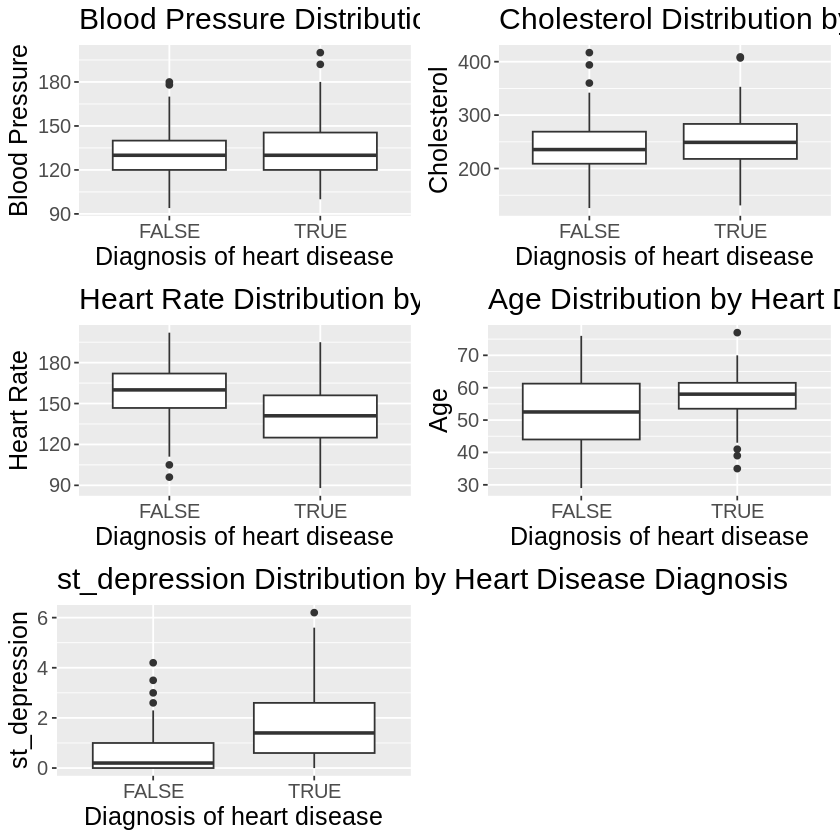

In [9]:
options(repr.plot.height = 7, repr.plot.width = 7)
bp_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = blood_pressure)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Blood Pressure", title = "Blood Pressure Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 15))

chol_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = cholesterol)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Cholesterol", title = "Cholesterol Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 15))

hr_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = heart_rate)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Heart Rate", title = "Heart Rate Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 15))
age_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = age)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Age", title = "Age Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 15))
dep_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = st_depression)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "st_depression", title = "st_depression Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 15))
plot_grid(bp_box_plot, chol_box_plot, hr_box_plot,age_box_plot, dep_box_plot, ncol = 2)


We can see that the number of observations for each diagnosis category are roughly balanced at 54% and 46%. We can also see that patients with heart disease, on average, have a higher serum cholesterol level and lower maximum heart rate. This aligns with our prediction in the introduction.

#### Visualizing the relationship between heart disease and chosen predictors

Now, let's visualize the relationship between heart disease and serum cholesterol and maximum heart rate with a scatter plot. We will use the ggplot function with heart_rate on the x-axis and cholesterol on the y-axis, colored by the diagnosis of the heart disease.

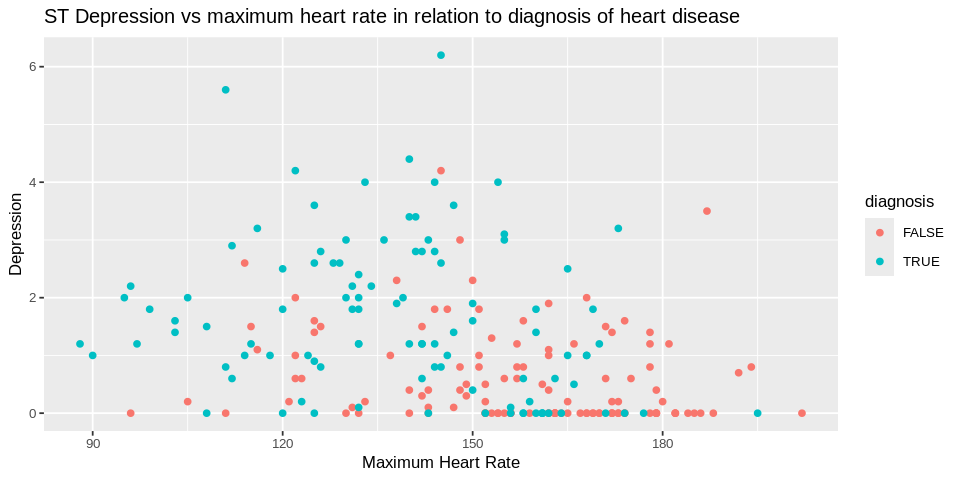

In [10]:
options(repr.plot.height = 4, repr.plot.width = 8)

bp_scatter <- cleveland_train |> 
            ggplot(aes(x = heart_rate, y = st_depression, color = diagnosis)) + 
            geom_point() +
            labs(x = "Maximum Heart Rate", y = "Depression", title = "ST Depression vs maximum heart rate in relation to diagnosis of heart disease") + 
            theme(text = element_text(size = 10))

bp_scatter

From our scatter plot above, we can see that people without heart disease have a higher heart rate and lower cholesterol level, and vice versa for people with heart disease.

## Determining best K value

Description Here

neighbors,mean
<int>,<dbl>
9,0.7313131
17,0.7309091
18,0.7309091
25,0.7267677
26,0.7267677
29,0.7267677


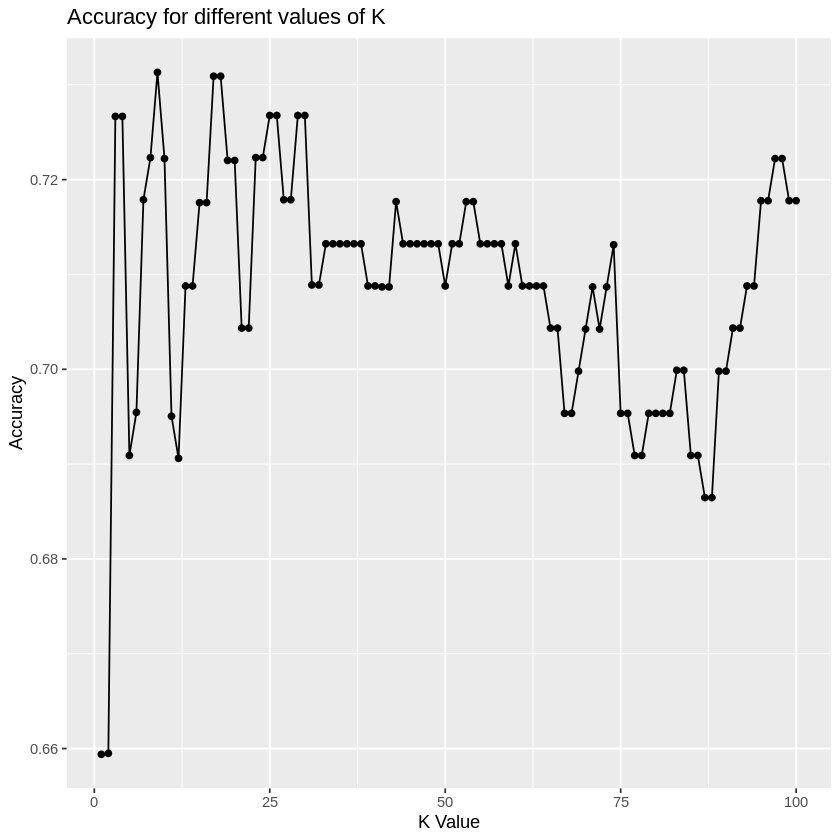

In [11]:
set.seed(0)
dep_recipe <- recipe(diagnosis ~ st_depression + heart_rate, data = cleveland_train) |> step_scale(all_predictors()) |> step_center(all_predictors())
dep_tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

dep_vfold <- vfold_cv(cleveland_train, v = 10, strata = diagnosis)
gridvals <- tibble(neighbors = c(1:100))

dep_wkflw <- workflow() |>
      add_recipe(dep_recipe) |>
      add_model(dep_tune_spec) |>
      tune_grid(resamples = hd_vfold, grid = gridvals) |>
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))
head(dep_wkflw)


options(repr.plot.height = 7, repr.plot.width = 7)
dep_result_plot <- dep_wkflw |> ggplot(aes(x = neighbors, y = mean)) + geom_point() + geom_line() + 
labs(x = "K Value", y = "Accuracy") + ggtitle("Accuracy for different values of K")
dep_result_plot

## Creating our Model

Description Here

In [12]:
kmin_dep <- dep_wkflw |> slice(1) |> pull(neighbors)

dep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin_dep) |>
  set_engine("kknn") |>
  set_mode("classification")

dep_fit <- workflow() |>
  add_recipe(dep_recipe) |>
  add_model(dep_spec) |>
  fit(data = cleveland_train)

## Testing our Model and Check It's Accuracy

Description Here

In [13]:
dep_summary <- dep_fit |>
  predict(cleveland_test) |>
  bind_cols(cleveland_test) 

dep_accuracy <- dep_summary |>
  metrics(truth = diagnosis, estimate = .pred_class) |>
  filter(.metric == 'accuracy')
dep_accuracy
dep_conf_mat<- dep_summary |> conf_mat(truth = diagnosis, estimate = .pred_class)
dep_conf_mat


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6710526


          Truth
Prediction FALSE TRUE
     FALSE    33   17
     TRUE      8   18

## Underfitting/Overfitting